# Predictive modelling of adult depression and anxiety

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns 
sns.set();

#### Importing all main sweep data into python from SPSS (.sav files)

In [2]:
import pyreadstat

sweep0123, meta1 = pyreadstat.read_sav("ncds0123.sav")
sweep0123_add, meta1_2 = pyreadstat.read_sav("ncds_pms_additionals.sav")

sweep4, meta4 = pyreadstat.read_sav("ncds4.sav")
sweep4_exams, meta4_2 = pyreadstat.read_sav("exams.sav")

sweep5_p, meta5 = pyreadstat.read_sav("ncds5p.sav")
sweep5_cmi, meta5_1 = pyreadstat.read_sav("ncds5cmi.sav")
sweep5_mc, meta5_2 = pyreadstat.read_sav("ncds5mc.sav")

sweep6, meta6 = pyreadstat.read_sav("ncds6.sav")

sweep7, meta7 = pyreadstat.read_sav("ncds7.sav")

# sweep8_ub, meta8 = pyreadstat.read_sav("ncds8_unfolding_brackets.sav")
sweep8_f, meta8_1 = pyreadstat.read_sav("ncds_2008_followup.sav")

#sweep9_cd, meta9_1 = pyreadstat.read_sav("ncds_2013_child_died.sav")
#sweep9_d, meta9_2 = pyreadstat.read_sav("ncds_2013_derived.sav")
#sweep9_e, meta9_3 = pyreadstat.read_sav("ncds_2013_employment.sav")
sweep9_fl, meta9_4 = pyreadstat.read_sav("ncds_2013_flatfile.sav")
#sweep9_h, meta9_5 = pyreadstat.read_sav("ncds_2013_housing.sav")
#sweep9_p, meta9_6 = pyreadstat.read_sav("ncds_2013_persongrid.sav")
#sweep9_q, meta9_7 = pyreadstat.read_sav("ncds_2013_qualifications.sav")
#sweep9_r, meta9_8 = pyreadstat.read_sav("ncds_2013_relationships.sav")
#sweep9_u, meta9_9 = pyreadstat.read_sav("ncds_2013_unfolding.sav")


In [3]:
#sweep8_ub = sweep8_ub.rename(columns={'NCDSID':'ncdsid'})
sweep8_f = sweep8_f.rename(columns={'NCDSID':'ncdsid'})
sweep7 = sweep7.rename(columns={'NCDSID':'ncdsid'})
sweep9_fl = sweep9_fl.rename(columns={'NCDSID':'ncdsid'})

#### Importing teaching data set

In [4]:
# NCDS data
malaise2, meta = pyreadstat.read_sav("n042malaise.sav")
# reading_data2, meta = pyreadstat.read_sav("n716reading.sav")
rutter2, meta = pyreadstat.read_sav("n016rutter.sav")
# keyvar2, meta = pyreadstat.read_sav("ncds_keyvariables.sav")
# maths2, meta = pyreadstat.read_sav("n716maths.sav")

new_data, meta = pyreadstat.read_sav("NCDS_dataset_new.sav")

## Importing NCDS data dictionaries to python from txt

By converting the original NCDS data dictionaries from Microsoft Word documents (.doc) to plain text (.txt) files, I could then import the dictionaries into python. 

In [5]:
# For ease, append all to this list, then loop over and function importing function
dictionaries = []
dictionaries.append(open('s0123_dict.txt', 'r').read()) # data dictionaries for sweeps 0-3 
dictionaries.append(open('s4_dict.txt', 'r').read()) # data dictionary for sweep 4 
dictionaries.append(open('s5_dict_cmi.txt', 'r').read()) # s5: Cohort member interview 
dictionaries.append(open('s5_dict_p.txt', 'r').read()) # s5: Parent 
dictionaries.append(open('s5_dict_mc.txt', 'r').read()) # s5: mother child 
dictionaries.append(open('s6_dict.txt', 'r').read()) # s6 
dictionaries.append(open('s7_dict.txt', 'r').read()) # s7 
dictionaries.append(open('s8_dict_fu.txt', 'r').read()) # s8 follow up 
dictionaries.append(open('s8_dict_ub.txt', 'r').read()) # s8 unfolding brackets 
dictionaries.append(open('s9_dict_cd.txt', 'r').read()) # s9 child died 
dictionaries.append(open('s9_dict_d.txt', 'r').read()) # s9 derived 
dictionaries.append(open('s9_dict_em.txt', 'r').read()) # s9 employment 
dictionaries.append(open('s9_dict_ff.txt', 'r').read()) # s9 flate file 
dictionaries.append(open('s9_dict_h.txt', 'r').read()) # s9 housing 
dictionaries.append(open('s9_dict_pg.txt', 'r').read()) # s9 persongrid
dictionaries.append(open('s9_dict_r.txt', 'r').read()) # s9 relationships 
dictionaries.append(open('malaise2_dict.txt', 'r').read()) # Malaise info ncds
dictionaries.append(open('n_rutter_dict.txt', 'r').read()) # Rutter info ncds

##### A function to convert plain text documents to 2 python dictionaries:
- First dictionary (Dictionary of strings): key = Variable/ Column Names, Values = definitions of variable 
- Second dictionary (Dictionary of Dictionaries): key = Variable/ Column Names, Values = Variable values (Dictionary) : labels and defintions

In [6]:
# funtionise the process
all_variables_sep = []
all_values = []

import re
def import_dictionary(s_dict):
    s_defs = [] # meaning of Variable/ column  names
    s_labels = [] # Variable/ column  names 
    index = 0
    
    s_dict = s_dict.split('Variable')
    s_var_count = re.split('Number of variables|Number of cases = ', s_dict[0]) # derive the variable count
    s_var_count = int(s_var_count[1].replace('\t', '').replace('\n', '').replace(' ', '').replace('=', ''))
    
    s_val2lab = [0]*s_var_count # Values and labels 
    
    # loop to split dictionary into the variable names, the definitions, and the value label definitions
    for string1 in s_dict:
        #print(string1, '\n \n NEXT \n')
        if string1.find(' =') == 0:
            #print(string1)
            s_labels.append(string1.replace(' = ', '').replace('\t', ''))
        if string1.find(' label') == 0: 
            string1 = re.split(' lab|This variable', string1)
            for s1 in string1:
                #print(s1, '\n \n NEXT \n')
                if s1.find('el =') == 0: 
                    s1 = s1.replace('el = ', '').replace('\n', '')
                    s_defs.append(s1) # append variable name to dictionary 
                if 'Pos.' in s1:
                    s2 = re.split('Pos.', s1)
                    #print(s2, '\n \n NEXT \n')
                    dict1={}
                    for str1 in s2: 
                        #print(str1, '\n \n NEXT \n')
                        if 'Label' in str1:
                            str2 = re.split('Va|La', str1)
                            #print(str2, '\n \n NEXT \n')
                            values123 = []
                            labels123 = []
                            for str3 in str2:
                                #print(str3, '\n \n NEXT \n')
                                if str3.find('lue') == 0:
                                    # append value names to lists
                                    if '.' in str3:
                                        values123.append(float(str3.replace('lue = ', '').replace('\t', '').replace('.0', '')))
                                    else:
                                        values123.append(int(str3.replace('lue = ', '').replace('\t', '').replace('.0', '')))
                                    # append label definitions    
                                if str3.find('bel') == 0:
                                    labels123.append(str3.replace('bel = ', '').replace('\t', '').replace('\n', ''))
                            # add labels definitions to a dictionary
                            for i, value in enumerate(values123):
                                    dict1[value] = labels123[i] 
                        s_val2lab[index] = dict1
                        if str1.find(' =') == 0: 
                            index = int(str1.replace(' = ', '').replace('\t', '') ) - 1
    # make dictionaries
    variable_names = dict(zip(s_labels, s_defs))
    value_labels = dict(zip(s_labels, s_val2lab))
    for dict1 in value_labels.values():
        #print(dict1)
        if dict1 != 0:
            for value in dict1:
                if value < 0 and np.nan in dict1:
                    del dict1[value]
                if value < 0 and np.nan in dict1 == False:
                    dict1[np.nan] = dict1[value]
                    del dict1[value]

            #print(dict1, '\n \n Next \n')
    all_variables_sep.append(variable_names)
    all_values.append(value_labels)
    
    return variable_names, value_labels

def Merge(list_of_dicts): 
    all_dict = {}
    for dicts in list_of_dicts:
        all_dict.update(dicts)
    return all_dict 

# Convert each dictionary into a python dictionary 
for dict1 in dictionaries:
    import_dictionary(dict1)

# Merge to 1 big dictionary
all_variables = Merge(all_variables_sep)
all_value_labels = Merge(all_values)

## Filter for Malaise scores

In [7]:
# make this function into a feature selection function

def search_var(df, word):
    m_vals = ['ncdsid']
    for val in all_variables.keys():
        if word in all_variables[val] or word in val or word.capitalize() in all_variables[val] or word.capitalize() in val or word.casefold() in all_variables[val] or word.casefold() in val:
            m_vals.append(val)
    print(m_vals)
    for val in m_vals: 
        print(val,':    ', all_variables[val])
    df2 = df.filter(items=m_vals)
    return df2

### Classifier creation

In [8]:
# values = totals
malaise2_totals = malaise2.filter(items=['ncdsid', 'n23mal', 'n33mal', 'n42mal']) 
# 1 = below depression boundary, 2 = above depression boundary
malaise2_groups = malaise2.filter(items=['ncdsid', 'n23malg', 'n33malg', 'n42malg']) 

mal50 = sweep8_f.filter(items=['ncdsid', 'ND8MAL', 'ND8MALG']).rename(columns={'ND8MAL':'n50mal', 'ND8MALG':'n50malg'})
malaise2_totals = pd.merge(malaise2_totals, mal50.drop(columns=['n50malg']), on='ncdsid', how='outer')
malaise2_groups = pd.merge(malaise2_groups, mal50.drop(columns=['n50mal']), on='ncdsid', how='outer')

# save to CSV to calculate transition matricies in R 
malaise2_totals.dropna().to_csv('mal_totals.csv')
malaise2_groups.dropna().to_csv('mal_groups.csv')

all_variables['n50mal'] = 'ncds age 50: total Malaise score'
all_variables['n50malg'] = 'ncds age 50: total Malaise score - grouped'

malaise2_groups

,ncdsid,n23malg,n33malg,n42malg,n50malg
0,N10001N,1.0,1.0,1.0,1.0
1,N10002P,1.0,1.0,1.0,1.0
2,N10003Q,NaN,NaN,NaN,NaN
3,N10004R,1.0,1.0,1.0,NaN
4,N10005S,NaN,NaN,NaN,NaN
...,...,...,...,...,...
18553,N28554F,NaN,NaN,NaN,NaN
18554,N28555G,1.0,NaN,NaN,NaN
18555,N28556H,2.0,2.0,2.0,NaN
18556,N28557J,1.0,1.0,1.0,1.0


#### One variable for 'Ever experience depression' 

In [9]:
malaise_ever = malaise2_groups.dropna()
malaise_ever['mal_ev'] = malaise_ever[['n23malg', 'n33malg', 'n42malg', 'n50malg']].astype(int).sum(1)
bins = [3, 4, 8]
malaise_ever['mal_ever'] = pd.cut(malaise_ever['mal_ev'], bins=bins, labels = [1,2])
malaise_ever = malaise_ever.filter(items=['ncdsid', 'mal_ever'])
# malaise_ever['mal_ever'].value_counts()

C:\Users\lukem\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lukem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### New more balanced groups for Malaise Inventory (Score of 5 or higher considiered Depression)

In [10]:
malaise2_groups2 = malaise2_totals.filter(items=['ncdsid'])
bins = [-1, 4, 25]
malaise2_groups2['n23malg2'] = pd.cut(malaise2_totals['n23mal'], bins=bins, labels=[1, 2])
malaise2_groups2['n33malg2'] = pd.cut(malaise2_totals['n33mal'], bins=bins, labels=[1, 2])
malaise2_groups2['n42malg2'] = pd.cut(malaise2_totals['n42mal'], bins=bins, labels=[1, 2])
bins = [-1, 2, 25]
malaise2_groups2['n50malg2'] = pd.cut(malaise2_totals['n50mal'], bins=bins, labels=[1, 2])

all_variables['n23malg2'] = 'ncds age 23: total Malaise score - grouped 2'
all_variables['n33malg2'] = 'ncds age 33: total Malaise score - grouped 2'
all_variables['n42malg2'] = 'ncds age 42: total Malaise score - grouped 2'
all_variables['n50malg2'] = 'ncds age 50: total Malaise score - grouped 2'

all_value_labels['n23malg2'] = {-2: 'not stated any questions', -1: 'incomplete info', 1: '0-7', 2: '8+'}
all_value_labels['n33malg2'] = {-2: 'not stated any questions', -1: 'incomplete info', 1: '0-7', 2: '8+'} 
all_value_labels['n42malg2'] = {-2: 'not stated any questions', -1: 'incomplete info', 1: '0-7', 2: '8+'} 
all_value_labels['n50malg2'] = {-2: 'not stated any questions', -1: 'incomplete info', 1: '0-7', 2: '8+'}

malaise2_groups2.dropna().to_csv('mal_groups2.csv')
malaise2_groups2

,ncdsid,n23malg2,n33malg2,n42malg2,n50malg2
0,N10001N,1,1,2,1
1,N10002P,1,1,1,1
2,N10003Q,NaN,NaN,NaN,NaN
3,N10004R,1,1,1,NaN
4,N10005S,NaN,NaN,NaN,NaN
...,...,...,...,...,...
18553,N28554F,NaN,NaN,NaN,NaN
18554,N28555G,1,NaN,NaN,NaN
18555,N28556H,2,2,2,NaN
18556,N28557J,2,1,2,2


In [11]:
malaise_ever2 = malaise2_groups2.filter(items=['ncdsid','n23malg2', 'n33malg2', 'n42malg2', 'n50malg2']).dropna()
malaise_ever2['mal_ev'] = malaise_ever2[['n23malg2', 'n33malg2', 'n42malg2', 'n50malg2']].astype(int).sum(1)
bins = [2, 4, 8]
malaise_ever2['mal_ever2'] = pd.cut(malaise_ever2['mal_ev'], bins=bins, labels = [1,2])
malaise_ever2 = malaise_ever2.filter(items = ['ncdsid', 'mal_ever2'])

# malaise_ever2

## EDA

#### Result histograms + Proportion data 

Create a function to produce histograms of Responces to data and create dictionaries of the proportions of answers. 

In [12]:
def props_and_hists(df):
    df1 = df
    df_cols = df1.columns
    num_cols = len(df_cols)
    props = {}
    fig = plt.figure(figsize=(10,10*num_cols))
    fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
    for i, col in enumerate(df_cols):
        if col != 'ncdsid' and col!='bcsid':
            df2 = df1[col].replace(np.nan, -1)
            vc = df2.value_counts(normalize=True, dropna=False).sort_index()
            if -1 in df2.unique():
                colours = ['r']
                for j in range(len(df2.unique())-1):
                    colours.append('b')
            else:
                colours = 'b'
            exec(f'ax{i} = fig.add_subplot({num_cols}, 1, {i})')
            eval('ax'+str(i)).bar(vc.index, vc.values, color = colours)
            eval('ax'+str(i)).set_ylabel('Frequency of Responce', fontsize=25)
            eval('ax'+str(i)).set_xlabel('Answer Label', fontsize=25)
            eval('ax'+str(i)).set_xticks(sorted(df2.astype(int).unique()))
            eval('ax'+str(i)).set_xticklabels(sorted(df2.astype(int).unique()), fontsize=15)
            props[col] = vc
            if col in all_variables:
                eval('ax'+str(i)).set_title(all_variables[col], fontsize=30)
            else:
                print(col, ' not in dictionaries \n')
                eval('ax'+str(i)).set_title(col, fontsize=30)
            extent = eval('ax'+str(i)).get_window_extent().transformed(fig.dpi_scale_trans.inverted())
            fig.savefig(r'C:\Users\lukem\Documents\DataScience\MSc\Disso\Diss\Images\{0}_hist.png'.format(col), bbox_inches=extent.expanded(1.3, 1.25))
    for key in props.keys(): 
        if key in all_variables:
            print('Variable label: ', all_variables[key])
            print(props[key], '\n')
        else:
            print('Variable label: ', key)
            print(props[key], '\n')
    return props

Variable label:  ncds age 23: total Malaise score
-1.0     0.328160
 0.0     0.174696
 1.0     0.120272
 2.0     0.098502
 3.0     0.078834
 4.0     0.054424
 5.0     0.041114
 6.0     0.030768
 7.0     0.022147
 8.0     0.014387
 9.0     0.012232
 10.0    0.007221
 11.0    0.005496
 12.0    0.004095
 13.0    0.003018
 14.0    0.001509
 15.0    0.001239
 16.0    0.000916
 17.0    0.000216
 18.0    0.000216
 19.0    0.000323
 20.0    0.000162
 21.0    0.000054
Name: n23mal, dtype: float64 

Variable label:  ncds age 33: total Malaise score
-1.0     0.389859
 0.0     0.188867
 1.0     0.120379
 2.0     0.083360
 3.0     0.063531
 4.0     0.043647
 5.0     0.031038
 6.0     0.021231
 7.0     0.015088
 8.0     0.010831
 9.0     0.007867
 10.0    0.007221
 11.0    0.004688
 12.0    0.003610
 13.0    0.002586
 14.0    0.001886
 15.0    0.001563
 16.0    0.000862
 17.0    0.000431
 18.0    0.000754
 19.0    0.000431
 20.0    0.000108
 21.0    0.000108
 22.0    0.000054
Name: n33mal, dtype: fl

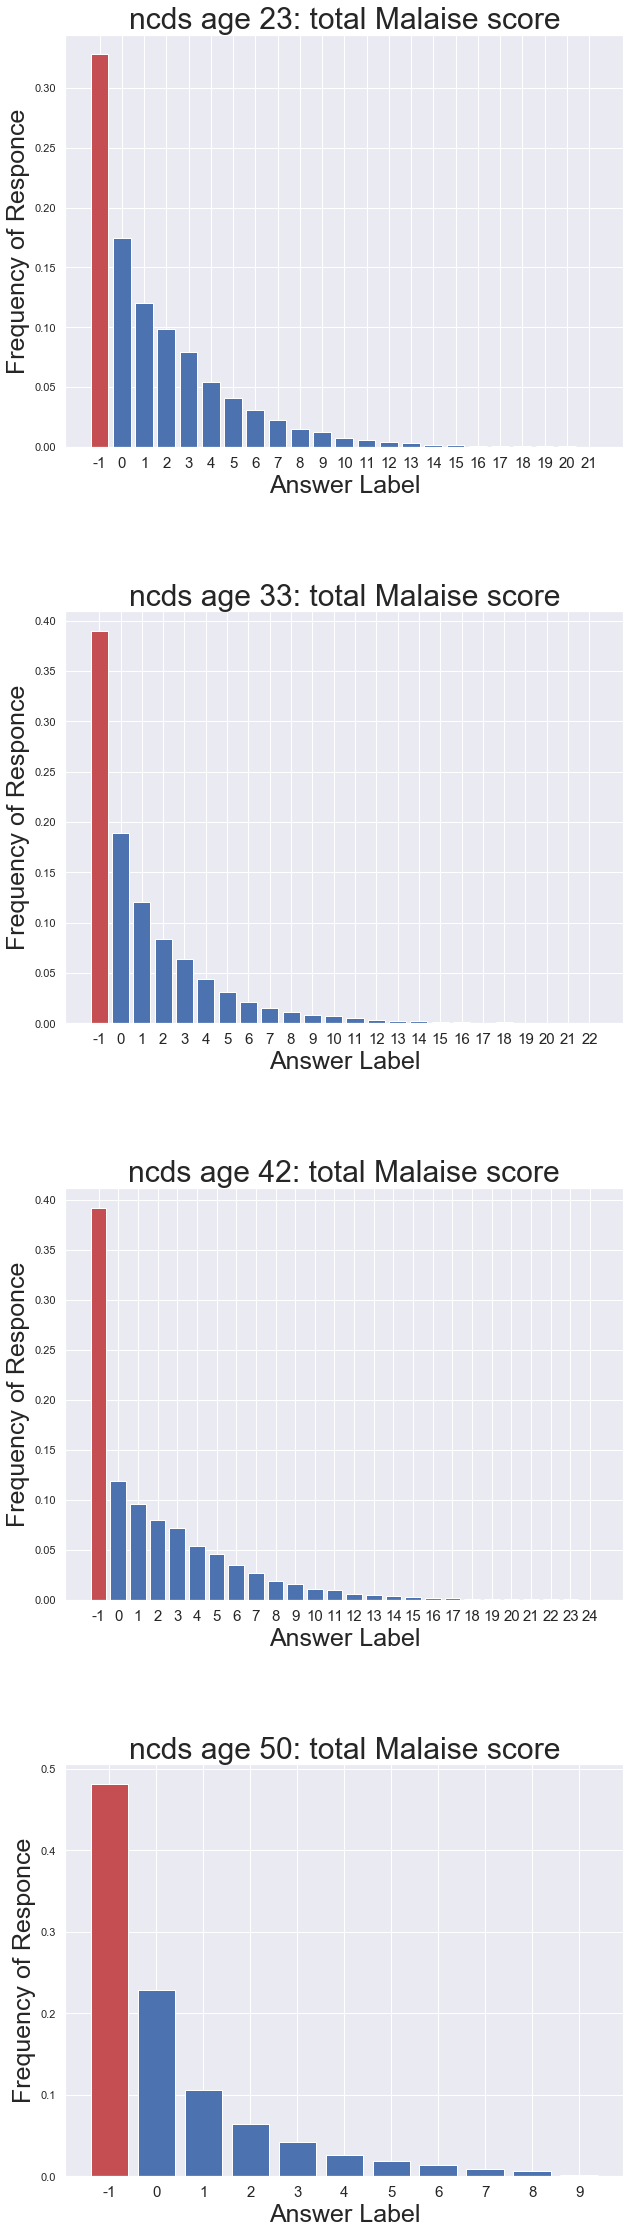

In [13]:
malaise2_totals_props = props_and_hists(malaise2_totals)

Variable label:  ncds age 23: total Malaise score - grouped
-1.0    0.328160
 1.0    0.620757
 2.0    0.051083
Name: n23malg, dtype: float64 

Variable label:  ncds age 33: total Malaise score - grouped
-1.0    0.389859
 1.0    0.567141
 2.0    0.043000
Name: n33malg, dtype: float64 

Variable label:  ncds age 42: total Malaise score - grouped
-1.0    0.392499
 1.0    0.526781
 2.0    0.080720
Name: n42malg, dtype: float64 

Variable label:  ncds age 50: total Malaise score - grouped
-1.0    0.481302
 1.0    0.442666
 2.0    0.076032
Name: n50malg, dtype: float64 



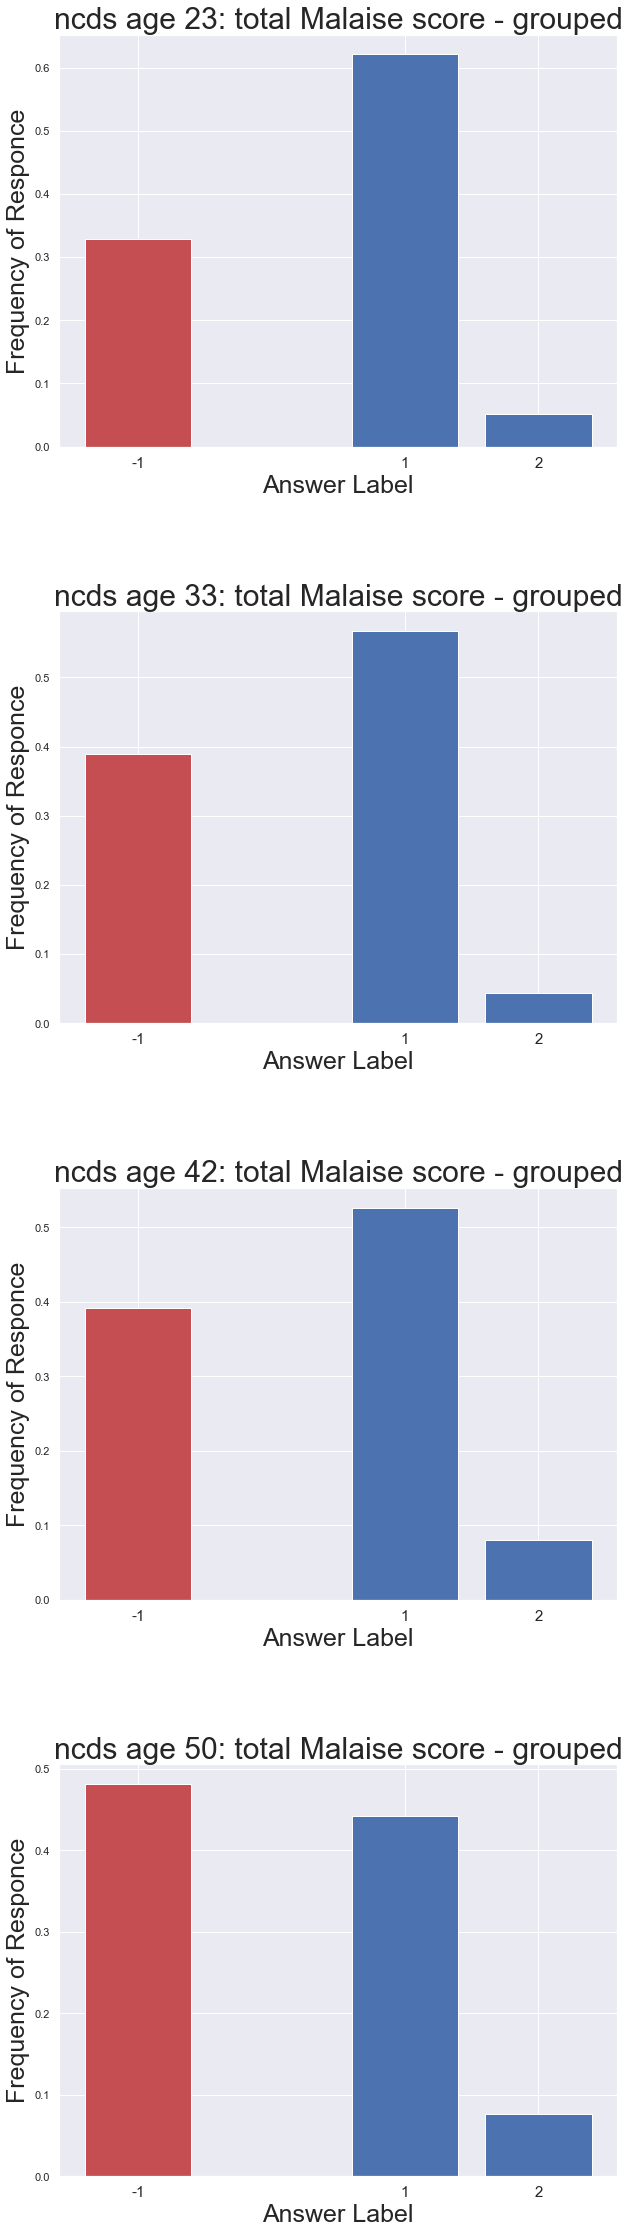

In [14]:
malaise2_groups_props = props_and_hists(malaise2_groups)

Variable label:  ncds age 23: total Malaise score - grouped 2
-1.0    0.328160
 1.0    0.526727
 2.0    0.145113
Name: n23malg2, dtype: float64 

Variable label:  ncds age 33: total Malaise score - grouped 2
-1.0    0.389859
 1.0    0.499784
 2.0    0.110357
Name: n33malg2, dtype: float64 

Variable label:  ncds age 42: total Malaise score - grouped 2
-1.0    0.392499
 1.0    0.419765
 2.0    0.187736
Name: n42malg2, dtype: float64 

Variable label:  ncds age 50: total Malaise score - grouped 2
-1.0    0.481302
 1.0    0.400205
 2.0    0.118493
Name: n50malg2, dtype: float64 



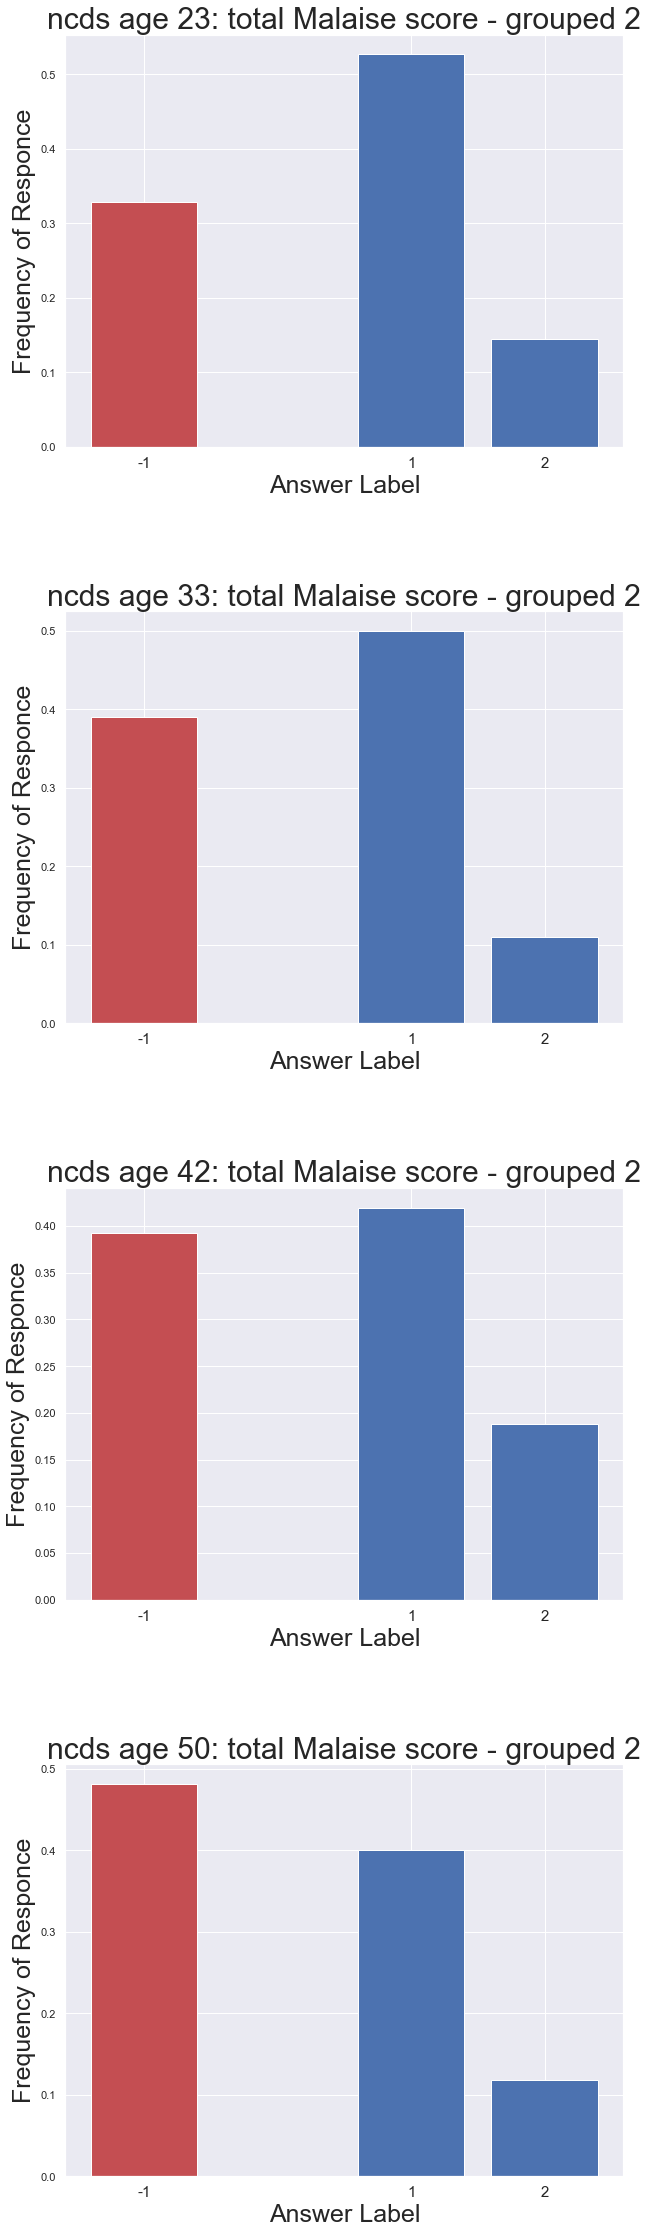

In [15]:
malaise2_groups2_props = props_and_hists(malaise2_groups2)

mal_ever  not in dictionaries 

Variable label:  mal_ever
1    0.770103
2    0.229897
Name: mal_ever, dtype: float64 



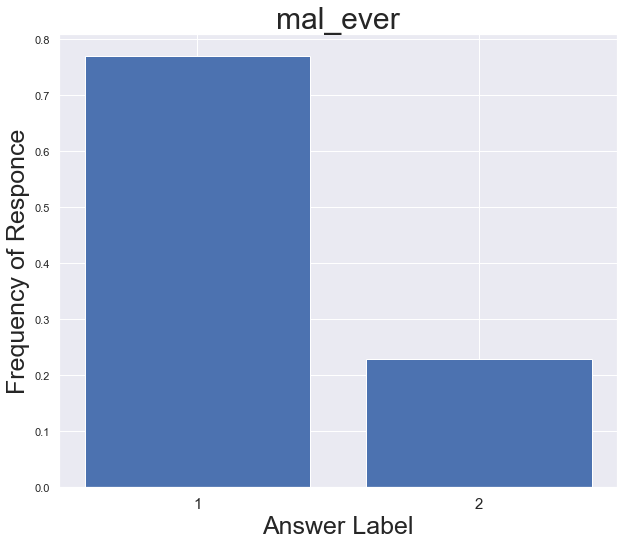

In [16]:
malaise_ever_props = props_and_hists(malaise_ever)

mal_ever2  not in dictionaries 

Variable label:  mal_ever2
1    0.549828
2    0.450172
Name: mal_ever2, dtype: float64 



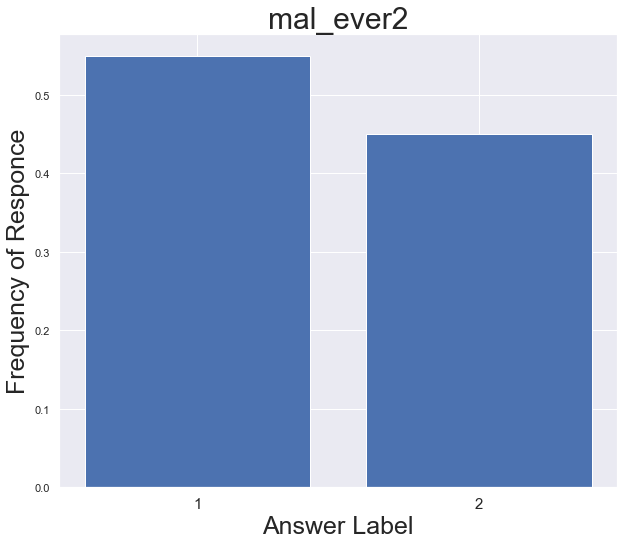

In [17]:
malaise_ever2_props = props_and_hists(malaise_ever2)

## Filtering the 'new_data(10)' data frame for features, by sweep. 

### Using original malaise groups 

#### New data frame features from sweeps 0 - 3 (age 0 to 16), to predict Malaise Groups at sweep 4 (age 24)

In [18]:
new_data = new_data.drop(columns=['c1', 'c_11', 'c_22', 'c_33', 'c_44'])

In [19]:
# Filter data for features from sweeps 0 to 3
new_sweep03_feats=[]
for var in new_data.columns:
    if var in all_variables_sep[0].keys():
        new_sweep03_feats.append(var)

# for malaise groups at sweep 4
new_variables = new_data.filter(items=new_sweep03_feats) # filtered data frame
malaise_class = malaise2_groups.filter(items=['ncdsid', 'n23malg']).dropna() # filter for malaise groups at age 23
sweep04_features = pd.merge(new_variables, malaise_class, on='ncdsid', how='inner') # new df only containing subjects with this malaise data
sweep04_features = sweep04_features.dropna(thresh=int(0.75*len(sweep04_features)), axis=1) # remove columns with over 20% NAN Values
sweep04_features = sweep04_features.dropna(thresh=int(0.8*len(sweep04_features.columns)), axis=0) # remove rows with over 10% NAN Values

for column in sweep04_features.columns:
    sweep04_features[column].fillna(sweep04_features[column].mode()[0], inplace=True)

# to predict 'malaise ever'
malaise_class = malaise_ever.filter(items=['ncdsid', 'mal_ever']).dropna()
sweep04_ever = pd.merge(sweep04_features.drop(columns=['n23malg']), malaise_class, on='ncdsid', how='inner')

# to predict Groups 2
malaise_class = malaise2_groups2.filter(items=['ncdsid', 'n23malg2']).dropna()
sweep04_g2 = pd.merge(sweep04_features.drop(columns=['n23malg']), malaise_class, on='ncdsid', how='inner')

# to predict 'malaise ever using groups 2'
malaise_class = malaise_ever2.filter(items=['ncdsid', 'mal_ever2']).dropna()
sweep04_ever2 = pd.merge(sweep04_features.drop(columns=['n23malg']), malaise_class, on='ncdsid', how='inner')

#### New data frame features from sweeps 0 - 4, to predict Malaise Groups at sweep 5. 

In [20]:
# Filter data for features from sweeps 0 to 4
new_sweep05_feats=[]
for var in new_data.columns:
    if var in all_variables_sep[0].keys() or var in all_variables_sep[1].keys():
        new_sweep05_feats.append(var)
        
new_variables = new_data.filter(items=new_sweep05_feats) # filtered data frame
malaise_class = malaise2_groups.filter(items=['ncdsid','n23malg', 'n33malg']).dropna() # filter for malaise groups at age 23
sweep05_features = pd.merge(new_variables, malaise_class, on='ncdsid', how='inner') # new df only containing subjects with this malaise data
sweep05_features = sweep05_features.dropna(thresh=int(0.8*len(sweep05_features)), axis=1) # remove columns with over 20% NAN Values
sweep05_features = sweep05_features.dropna(thresh=int(0.9*len(sweep05_features.columns)), axis=0) # remove rows with over 10% NAN Values

for column in sweep05_features.columns:
    sweep05_features[column].fillna(sweep05_features[column].mode()[0], inplace=True) 

# to predict groups 2
malaise_class = malaise2_groups2.filter(items=['ncdsid', 'n23malg2', 'n33malg2']).dropna()
sweep05_g2 = pd.merge(sweep05_features.drop(columns=['n23malg', 'n33malg']), malaise_class, on='ncdsid', how='inner')
# sweep05_g2

#### New data frame features from sweep 0-5 (age 42) to predict mal group at sweep 6 (age 42)

In [21]:
# Filter data for features from sweeps 0 to 5
new_sweep06_feats=[]
for var in new_data.columns:
    if var in all_variables_sep[0].keys() or var in all_variables_sep[1].keys() or var in all_variables_sep[2].keys() or var in all_variables_sep[3].keys() or var in all_variables_sep[4].keys():
        new_sweep06_feats.append(var)
        
new_variables = new_data.filter(items=new_sweep06_feats) # filtered data frame
malaise_class = malaise2_groups.filter(items=['ncdsid','n23malg', 'n33malg', 'n42malg']).dropna() # filter for malaise groups at age 23
sweep06_features = pd.merge(new_variables, malaise_class, on='ncdsid', how='inner') # new df only containing subjects with this malaise data
sweep06_features = sweep06_features.dropna(thresh=int(0.75*len(sweep06_features)), axis=1) # remove columns with over 20% NAN Values
sweep06_features = sweep06_features.dropna(thresh=int(0.8*len(sweep06_features.columns)), axis=0) # remove rows with over 10% NAN Values

for column in sweep06_features.columns:
    sweep06_features[column].fillna(sweep06_features[column].mode()[0], inplace=True)

# to predict group 2
malaise_class = malaise2_groups2.filter(items=['ncdsid', 'n23malg2', 'n33malg2', 'n42malg2']).dropna()
sweep06_g2 = pd.merge(sweep06_features.drop(columns=['n23malg', 'n33malg', 'n42malg']), malaise_class, on='ncdsid', how='inner')
# sweep06_g2     

#### New data frame features from sweep 0-6 (age 42) to predict mal group at sweep 8 (age 50)

In [22]:
# Filter data for features from sweeps 0 to 7 
new_sweep07_feats=[]
for var in new_data.columns:
    if var in all_variables_sep[0].keys() or var in all_variables_sep[1].keys() or var in all_variables_sep[2].keys() or var in all_variables_sep[3].keys() or var in all_variables_sep[4].keys() or var in all_variables_sep[5].keys():
        new_sweep07_feats.append(var)
        
new_variables = new_data.filter(items=new_sweep07_feats).drop(columns=['mal23']) # filtered data frame
malaise_class = malaise2_groups.filter(items=['ncdsid','n23malg', 'n33malg', 'n42malg', 'n50malg']).dropna() # filter for malaise groups at age 23
sweep08_features = pd.merge(new_variables, malaise_class, on='ncdsid', how='inner') # new df only containing subjects with this malaise data
sweep08_features = sweep08_features.dropna(thresh=int(0.75*len(sweep08_features)), axis=1) # remove columns with over 20% NAN Values
sweep08_features = sweep08_features.dropna(thresh=int(0.8*len(sweep08_features.columns)), axis=0) # remove rows with over 10% NAN Values

for column in sweep08_features.columns:
    sweep08_features[column].fillna(sweep08_features[column].mode()[0], inplace=True)

# remove cols with string values (doesnt work with my OHEncoding method.)
for col in sweep08_features.iloc[:, 1:-1].columns:
    if type(sweep08_features[col][0]) == str:
        sweep08_features = sweep08_features.drop(col,axis=1)

# to predict group 2
malaise_class = malaise2_groups2.filter(items=['ncdsid', 'n23malg2', 'n33malg2', 'n42malg2', 'n50malg2']).dropna()
sweep08_g2 = pd.merge(sweep08_features.drop(columns=['n23malg', 'n33malg', 'n42malg', 'n50malg']), malaise_class, on='ncdsid', how='inner')
# sweep08_g2     

# Model creation: Random Forest Classifier 

In [23]:
# Import packages
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score,  KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer, accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.utils import compute_class_weight
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC  

In [24]:
# A function to one hot encode the features
def oh_encode(df):
    
    id_num = df.iloc[:, -1]
    clas = df.iloc[:, 0]
    
    # only columns with less than 20 unique values will be one hot encoded
    ohe_cols=[]
    for col in df.iloc[:, 1:-1].columns:
        if len(df[col].unique()) < 20:
            ohe_cols.append(col)
    
    df2 = pd.get_dummies(df.iloc[:, 1:-1].astype(int).astype(str), columns = ohe_cols)
    df2 = pd.concat([df2, id_num], axis =1)
    df2 = pd.concat([clas, df2], axis=1)
    
    return df2

In [25]:
# Function to print proportions of 1s and 2s
def proportions(y_pred):
    
    ones = 0
    twos = 0

    for num in y_pred:
        if (int(num) == 1):
            ones+=1
        else:
            twos+=1

    ones = ones/len(y_pred)
    twos = twos/len(y_pred)
    
    print('Proportions: \nOnes: {0}\nTwos: {1}'.format(ones, twos))

In [26]:
# Some value needed
random_state = 2
f1_score2 = make_scorer(f1_score, pos_label=2, average='binary')

#### One Hot Encode the data.

In [27]:
# 4 short term future prediction 
ohe04 = oh_encode(sweep04_features)
ohe05 = oh_encode(sweep05_features)
ohe06 = oh_encode(sweep06_features)
ohe08 = oh_encode(sweep08_features)

# Ever malaise class
ohe04_ever = oh_encode(sweep04_ever)

# Groups 2
ohe04_g2 = oh_encode(sweep04_g2)
ohe05_g2 = oh_encode(sweep05_g2)
ohe06_g2 = oh_encode(sweep06_g2)
ohe08_g2 = oh_encode(sweep08_g2)

# Ever Malaise using groups 2
ohe04_ever2 = oh_encode(sweep04_ever2)

#### Random Forest Classifier 

In [28]:
def random_forest(df):

    # X and y train 
    y1 = df.iloc[:, -1].to_numpy()
    X1 = df.iloc[:, 1:-1].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=random_state)

    #print proportions of 1s and 2s in train and test set  
    print('y_test proportions:\n')
    proportions(y_test)
    print('\ny_train proportions:\n')
    proportions(y_train)
    print('\n')
    
    # Define the Cross validation method and Classifier
    kf = KFold(n_splits=5, random_state=random_state, shuffle=False) # How to perform cross validation
    rf = RandomForestClassifier(min_samples_leaf=25, n_estimators = 1000) # the classifier to use

    # score the gridsearchCV on the f1 score
    params = {'class_weight' : [{1:0.35, 2:0.65}, {1:0.3, 2:0.7}, {1:0.25, 2:0.75}, {1:0.2, 2:0.8}, {1:0.15, 2:0.85}], # [{1:0.5, 2:0.5}, {1:0.4, 2:0.6}, {1:0.3, 2:0.7}, {1:0.25, 2:0.75}, {1:0.2, 2:0.8}, {1:0.15, 2:0.85}]
    'max_features' : ['auto', 'log2'], # ['auto', 'log2']
    'criterion' : ['gini', 'entropy'] } # ['gini', 'entropy']
    new_params = {'randomforestclassifier__' + key: params[key] for key in params}
    
    # Make Pipeline to randomly oversample all training data used in cross validation
    imba_pipeline = make_pipeline(SMOTE(random_state=random_state), rf)
    grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=f1_score2,
                                                    return_train_score=True, verbose=10)                        
    grid_imba.fit(X_train, y_train) # Fit gridsearchCV to traiuning set 

    y_pred = grid_imba.predict(X_test) # Predict on Unseen test set 
    y_proba = grid_imba.predict_proba(X_test) # Predict Probabilities to use in ROC Curves

    print('\ny_pred proportions:\n')
    proportions(y_pred)
    print('\n')
    
    score1 = precision_recall_fscore_support(y_test, y_pred, pos_label=2, average='binary')
 
    print('\nBest score in CV: ', grid_imba.best_score_, '\n')
    print('Best Estimator: ', grid_imba.best_estimator_, '\n')
    print('Best parameters: ', grid_imba.best_params_, '\n')
    print('Test accuracy score: ', accuracy_score(y_test, y_pred))
    print('\nF1 Scoring for Depressed Class.\nTest precision: ', score1[0])
    print('Test recall: ', score1[1])
    print('Test f1 accuracy score: ', score1[2])
    
    return grid_imba, y_test, y_proba, y_pred

#### Logistic Regression 

In [29]:
def log_reg(df):
    # X and y train 
    y1 = df.iloc[:, -1].to_numpy()
    X1 = df.iloc[:, 1:-1].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=random_state)
    
    #print proportions of 1s and 2s in train and test set  
    print('y_test proportions:\n')
    proportions(y_test)
    print('\ny_train proportions:\n')
    proportions(y_train)
    print('\n')
    
    # Define the Cross validation method and Classifier
    kf = KFold(n_splits=5, random_state=random_state, shuffle=False) # How to perform cross validation
    logreg = LogisticRegression(max_iter=10000)
    
    params = {'solver':('newton-cg', 'lbfgs', 'liblinear'), # ('newton-cg', 'lbfgs', 'liblinear')
                  'C':[0.0001, 0.01, 1], # [0.0001, 0.01, 1]
                  'class_weight' : [{1:0.35, 2:0.65}, {1:0.3, 2:0.7}, {1:0.25, 2:0.75}, {1:0.2, 2:0.8}, {1:0.15, 2:0.85}] # [{1:0.45, 2:0.55}, {1:0.3, 2:0.7}, {1:0.25, 2:0.75}, {1:0.2, 2:0.8}, {1:0.15, 2:0.85}]
                   } 
    new_params = {'logisticregression__' + key: params[key] for key in params}
                            
    imba_pipeline = make_pipeline(SMOTE(random_state=random_state), logreg)

    grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=f1_score2,
                                                    return_train_score=True, verbose=10)
                            
    grid_imba.fit(X_train, y_train)

    y_pred = grid_imba.predict(X_test)
    y_proba = grid_imba.predict_proba(X_test)

    proportions(y_pred)
    
    score1 = precision_recall_fscore_support(y_test, y_pred, pos_label=2, average='binary')
   
    print('\nBest score in CV: ', grid_imba.best_score_, '\n')
   # print('Best Estimator: ', grid_imba.best_estimator_, '\n')
    print('Best parameters: ', grid_imba.best_params_, '\n')
    print('Test accuracy score: ', accuracy_score(y_test, y_pred))
    print('\nF1 Scoring for Depressed Class.\nTest precision: ', score1[0])
    print('Test recall: ', score1[1])
    print('Test f1 accuracy score: ', score1[2])
    
    
    return grid_imba, y_test, y_proba, y_pred

#### Support vector machine (Running times too long with approriate grid search)

In [30]:
def SVM_class(df):
    # X and y train 
    y1 = df.iloc[:, -1].to_numpy()
    X1 = df.iloc[:, 1:-1].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=random_state)


    #print proportions of 1s and 2s in train and test set  
    print('y_test proportions:\n')
    proportions(y_test)
    print('\ny_train proportions:\n')
    proportions(y_train)
    print('\n')

    kf = KFold(n_splits=5, random_state=random_state, shuffle=False) # How to perform cross validation
    # Logistic regression with grid search cross-validation, using f1 scoring of the depressed class 
    params = {'C': [0.001, 0.01], # 'C' : [0.01, 0.1, 1, 10]
                  'gamma': [1, 0.001],   # 'gamma': [1,0.1,0.01,0.001]
                  'kernel': ['poly']} # 'kernel': ['rbf', 'poly', 'sigmoid']
    svc = SVC()
    new_params = {'svc__' + key: params[key] for key in params}
    imba_pipeline = make_pipeline(SMOTE(random_state=random_state), svc)
    grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=f1_score2,
                                                    return_train_score=True, verbose=10)
                            
    grid_imba.fit(X_train, y_train)
    y_pred = grid_imba.predict(X_test) # predict X test
    y_proba = grid_imba.predict_proba(X_test)
    
    proportions(y_pred)
    
    score1 = precision_recall_fscore_support(y_test, y_pred, pos_label=2, average='binary')
 
    print('\nBest score in CV: ', clf.best_score_, '\n')
  #  print('Best Estimator: ', clf.best_estimator_, '\n')
    print('Best parameters: ', clf.best_params_, '\n')
    print('Test accuracy score: ', accuracy_score(y_test, y_pred))
    print('\nF1 Scoring for Depressed Class.\nTest precision: ', score1[0])
    print('Test recall: ', score1[1])
    print('Test f1 accuracy score: ', score1[2])
    
    return grid_imba, y_test, y_proba, y_pred

### Plotting ROC curves, F1 scores, and feature importances. 

In [31]:
def roc_curves_all_classifiers(df):
    classifiers = [random_forest(df), log_reg(df)] # run both classifiers
    columns = df.iloc[:, 1:-1].columns
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc']) # create table to save the results in
    f1_scores = [] # list to save accuracy scores in
    name1 = ['RandomForest', 'LogisticRegression']
    clfs = []
    for index, clf1 in enumerate(classifiers):
        clf, y_test, yproba, y_pred = clf1
        clfs.append(clf)

        # Calculate precision, recall, and f1 scores
        score_2 = precision_recall_fscore_support(y_test, y_pred, pos_label=2, average='binary') 
        f1_scores.append([score_2[0], score_2[1], score_2[2]])


        yproba1 = yproba[::,1]
        fpr1, tpr1, _ = roc_curve(y_test,  yproba1, pos_label = 2)
        auc1 = roc_auc_score(y_test, yproba1)
        result_table = result_table.append({'classifiers':name1[index],
                                                    'fpr':fpr1, 
                                                    'tpr':tpr1, 
                                                    'auc':auc1}, ignore_index=True)


        # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)


            # PLot Precision and Recall on Bar charts 
    rf_scores = f1_scores[0]
    lr_scores = f1_scores[1]
    barWidth = 0.25
    r1 = np.arange(3)
    r2 = [x + barWidth for x in r1]
    plt.bar(r1, rf_scores, color='Blue', width=barWidth, edgecolor='white', label='RandomForest')
    plt.bar(r2, lr_scores, color='Orange', width=barWidth, edgecolor='white', label='LogisticRegression')
    plt.xlabel('Score Method', fontweight='bold')
    plt.xticks([r + barWidth for r in range(3)], ['Precision', 'Recall', 'F1 score'])
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.title('Precision, Recall, and F1 scores of the Depressed Class', fontweight='bold', fontsize=15)
    plt.legend()
    plt.show()


    # PLot AUC Curves
    loc = ['lower right', 'upper left']
    fig = plt.figure(figsize=(8,6))
    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'],
                        result_table.loc[i]['tpr'],
                        label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.show()


    ##### Feature Weights of LRC
    importance = clfs[1].best_estimator_.named_steps['logisticregression'].coef_[0]
    top_ten = np.concatenate((np.argpartition(importance, -5)[-5:], np.argpartition(importance, 5)[:5] ),axis=0)

    # summarize feature importance
    weights = importance[top_ten]
    var_names = []
    var_defs = []
    value_defs = []
    for str1 in columns[top_ten]:
        var = str1.rsplit('_', 1)[0]
        label = int(str1.rsplit('_', 1)[1])
        var_names.append(str1)
        if var in all_variables:
            var_defs.append(all_variables[var])
            if label in all_value_labels[var].keys():
                value_defs.append(all_value_labels[var][label])
            else:
                value_defs.append('Not Found')
        else:
            var_defs.append('Not Found')
            value_defs.append('Not Found')


    plt.bar(var_names, weights, color='orange')
    plt.title('Top Five and Bottom Five Feature Weights from Logistic Regression',  fontsize=20)
    plt.ylabel('Feature Weight', fontsize=17)
    plt.xlabel('Feature Label',  fontsize=17)
    plt.xticks(rotation=45, ha="right",  fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

    print(pd.DataFrame(
        {'Variable Label': var_names,
         'Definition': var_defs,
         'Response' : value_defs,
          'Feature Weight': weights}).to_latex(index=False))


    ###### Feature Importance for RFC 
    feat_importances = pd.Series(clfs[0].best_estimator_.named_steps['randomforestclassifier'].feature_importances_, columns).nlargest(10)
    feat_importances.nlargest(10).plot(kind='bar', color='blue')
    plt.title('Top Ten Most Important Feature from Random Forest ',  fontsize=20)
    plt.ylabel('Feature Importance', fontsize=17)
    plt.xlabel('Feature Label',  fontsize=17)
    plt.xticks(rotation=45, ha="right",  fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

    weights = []
    var_names = []
    var_defs = []
    value_defs = []
    for str1 in feat_importances.index:
        weights.append(feat_importances[str1])
        var = str1.rsplit('_', 1)[0]
        label = int(str1.rsplit('_', 1)[1])
        var_names.append(str1)
        if var in all_variables:
            var_defs.append(all_variables[var])
        else:
            var_defs.append('Not Found')
        if label in all_value_labels[var].keys():
            value_defs.append(all_value_labels[var][label])
        else:
            value_defs.append('Not Found')

    print(pd.DataFrame(
        {'Variable Label': var_names,
         'Definition': var_defs,
         'Response' : value_defs,
          'Feature Weight': weights}).to_latex(index=False))
    
    return classifiers

# Model Results for Malaise groups

In [33]:
# ohe04_results = roc_curves_all_classifiers(ohe04)

In [34]:
#ohe05_results = roc_curves_all_classifiers(ohe05)

In [35]:
#ohe06_results = roc_curves_all_classifiers(ohe06)

In [36]:
# ohe08_results = roc_curves_all_classifiers(ohe08)

In [37]:
# ohe04_ever_results = roc_curves_all_classifiers(ohe04_ever)

# Model Results for Malaise groups 2

y_test proportions:

Proportions: 
Ones: 0.7890410958904109
Twos: 0.21095890410958903

y_train proportions:

Proportions: 
Ones: 0.7897061062890208
Twos: 0.21029389371097915


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.648, test=0.423), total=  32.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.2s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.652, test=0.428), total=  31.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.652, test=0.453), total=  32.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.655, test=0.448), total=  32.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.657, test=0.458), total=  31.7s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.591, test=0.463), total=  12.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.0min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.587, test=0.443), total=  12.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.2min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.591, test=0.472), total=  12.9s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.5min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.586, test=0.447), total=  12.9s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.7min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.593, test=0.465), total=  12.9s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.655, test=0.436), total=  36.3s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.657, test=0.430), total=  36.1s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestcl

[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.639, test=0.461), total=  37.2s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.542, test=0.450), total=  16.8s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.544, test=0.439), total=  15.8s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier_

[CV]  randomforestclassifier__class_weight={1: 0.25, 2: 0.75}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.483, test=0.443), total=  16.4s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.518, test=0.448), total=  37.2s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.515, test=0.419), total=  36.0s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features

[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.444, test=0.421), total=  33.4s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.356, test=0.354), total=  13.1s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.362, test=0.333), total=  13.3s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_f

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 44.1min finished



y_pred proportions:

Proportions: 
Ones: 0.6894977168949772
Twos: 0.3105022831050228



Best score in CV:  0.4650242522503924 

Best Estimator:  Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=2, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={1: 0.3, 2: 0.7},
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.384, test=0.378), total=   5.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.387, test=0.364), total=   6.6s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.0s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.384, test=0.379), total=   5.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.384, test=0.382), total=   5.6s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.6s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.380, test=0.400), total=   5.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   30.1s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.384, test=0.378), total=   3.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   34.0s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.387, test=0.364), total=   3.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   37.6s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.384, test=0.379), total=   3.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   41.0s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.384, test=0.382), total=   3.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   45.0s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.380, test=0.400), total=   3.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear, score=(train=0.386, test=0.380), total=   2.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear, score=(train=0.389, test=0.363), total=   2.1s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregress

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.356, test=0.355), total=   3.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.359, test=0.347), total=   3.1s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.351, test=0.376), total=   2.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=libl

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.347, test=0.351), total=   2.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.353, test=0.326), total=   2.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.347, test=0.348), total=   2.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, s

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.466, test=0.421), total=   7.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.459, test=0.442), total=   8.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.455, test=0.431), total=  13.2s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.46

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.404, test=0.383), total=   8.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.412, test=0.391), total=   8.3s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.404, test=0.404), total=   8.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(tr

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.579, test=0.395), total=  29.7s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.579, test=0.396), total=  30.8s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.587, test=0.431), total=  29.7s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(t

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.545, test=0.405), total=  29.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.546, test=0.389), total=  19.9s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.547, test=0.397), total=  27.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(t

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=liblinear, score=(train=0.524, test=0.408), total=   4.8s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.497, test=0.402), total=  23.8s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.509, test=0.380), total=  16.9s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(tra

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 41.0min finished


Proportions: 
Ones: 0.4474885844748858
Twos: 0.5525114155251142

Best score in CV:  0.43395507491257684 

Best parameters:  {'logisticregression__C': 0.01, 'logisticregression__class_weight': {1: 0.35, 2: 0.65}, 'logisticregression__solver': 'liblinear'} 

Test accuracy score:  0.5735159817351598

F1 Scoring for Depressed Class.
Test precision:  0.3049586776859504
Test recall:  0.7987012987012987
Test f1 accuracy score:  0.4413875598086124


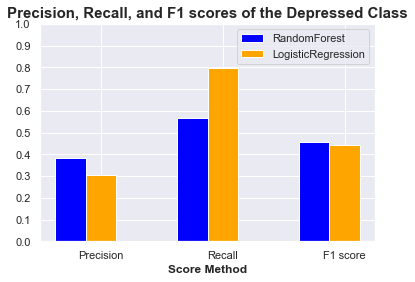

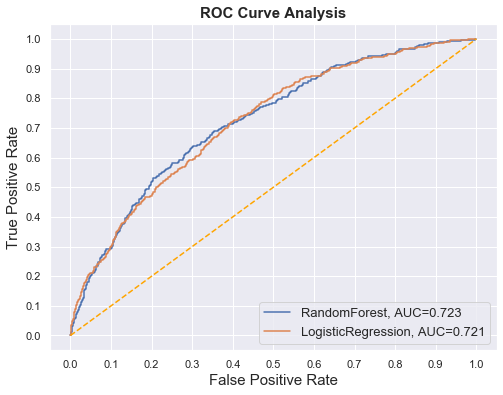

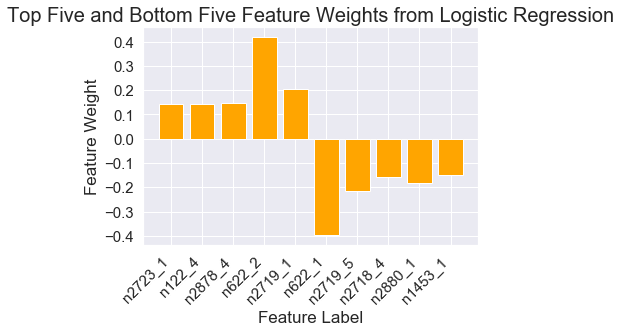

\begin{tabular}{lllr}
\toprule
Variable Label &                                Definition &         Response &  Feature Weight \\
\midrule
       n2723\_1 &  3I Always ready to help teacher-stdychld &        Very true &        0.141476 \\
        n122\_4 &   1P Meeting other kids outside household &      Very little &        0.142903 \\
       n2878\_4 &  3I Satisfied-sporting facilities in area &     Not bothered &        0.148382 \\
        n622\_2 &                         0-3D Sex of child &           Female &        0.417144 \\
       n2719\_1 &   3I Diff. to keep mind on work-stdy chld &        Very true &        0.205474 \\
        n622\_1 &                         0-3D Sex of child &             Male &       -0.396930 \\
       n2719\_5 &   3I Diff. to keep mind on work-stdy chld &  Not true at all &       -0.215969 \\
       n2718\_4 &         3I Homework is a bore-study child &   Usually untrue &       -0.156042 \\
       n2880\_1 &     3I Stdy chld gets on well with mother &

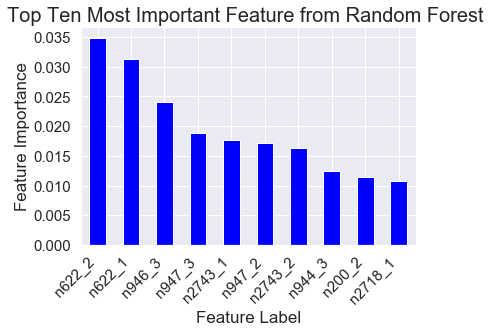

\begin{tabular}{lllr}
\toprule
Variable Label &                                Definition &        Response &  Feature Weight \\
\midrule
        n622\_2 &                         0-3D Sex of child &          Female &        0.034869 \\
        n622\_1 &                         0-3D Sex of child &            Male &        0.031225 \\
        n946\_3 &  2T Pupil sews,knits outside school hours &     Hardly ever &        0.024142 \\
        n947\_3 &   2T Pupil makes models out of school hrs &     Hardly ever &        0.018900 \\
       n2743\_1 &          3I Truancy this year-study child &             Yes &        0.017752 \\
        n947\_2 &   2T Pupil makes models out of school hrs &       Sometimes &        0.017168 \\
       n2743\_2 &          3I Truancy this year-study child &              No &        0.016276 \\
        n944\_3 &                            2T Pupil cooks &     Hardly ever &        0.012488 \\
        n200\_2 &                 1P Tenure of accomodation &  Owner o

In [40]:
ohe04_g2_results = roc_curves_all_classifiers(ohe04_g2)

y_test proportions:

Proportions: 
Ones: 0.8207600680657969
Twos: 0.17923993193420307

y_train proportions:

Proportions: 
Ones: 0.8367694344618877
Twos: 0.16323056553811235


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.621, test=0.442), total=  26.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.7s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.633, test=0.384), total=  34.6s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.616, test=0.431), total=  27.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.623, test=0.452), total=  26.1s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.612, test=0.385), total=  26.1s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.601, test=0.356), total=  13.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.7min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.624, test=0.382), total=  11.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.9min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.603, test=0.419), total=  11.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.1min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.615, test=0.398), total=  10.9s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.3min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.606, test=0.358), total=  11.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.624, test=0.444), total=  31.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.631, test=0.392), total=  31.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestcl

[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.642, test=0.437), total=  32.2s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.578, test=0.382), total=  13.1s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.573, test=0.351), total=  13.0s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier_

[CV]  randomforestclassifier__class_weight={1: 0.25, 2: 0.75}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.499, test=0.407), total=  12.8s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.555, test=0.405), total=  28.4s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.573, test=0.378), total=  29.1s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features

[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.465, test=0.384), total=  30.7s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.298, test=0.280), total=  12.0s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.302, test=0.253), total=  12.2s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_f

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 37.5min finished



y_pred proportions:

Proportions: 
Ones: 0.7390811117413499
Twos: 0.26091888825865



Best score in CV:  0.4564767174500305 

Best Estimator:  Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=2, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={1: 0.25, 2: 0.75},
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.295, test=0.292), total=   3.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.301, test=0.268), total=   3.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.292, test=0.321), total=   3.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.300, test=0.286), total=   3.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.0s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.292, test=0.310), total=   3.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.0s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.295, test=0.292), total=   2.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.1s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.301, test=0.268), total=   1.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.1s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.292, test=0.321), total=   1.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.1s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.300, test=0.286), total=   1.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   26.1s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.292, test=0.310), total=   2.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear, score=(train=0.295, test=0.290), total=   1.1s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear, score=(train=0.302, test=0.267), total=   1.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregress

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.274, test=0.310), total=   1.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.283, test=0.273), total=   1.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.277, test=0.295), total=   2.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=libl

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.283, test=0.273), total=   1.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.288, test=0.253), total=   1.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.273, test=0.309), total=   1.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, s

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.419, test=0.380), total=   5.3s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.422, test=0.385), total=   5.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.424, test=0.344), total=   8.3s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.44

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.341, test=0.364), total=   5.5s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.348, test=0.318), total=   5.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.349, test=0.354), total=   6.2s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(tr

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.598, test=0.350), total=  13.6s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.583, test=0.398), total=  14.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.574, test=0.371), total=  15.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(t

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.568, test=0.343), total=  14.2s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.563, test=0.332), total=  16.2s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.544, test=0.387), total=   9.9s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(t

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=liblinear, score=(train=0.525, test=0.379), total=   2.8s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.510, test=0.341), total=  12.2s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.516, test=0.326), total=  10.3s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(tra

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 27.6min finished


Proportions: 
Ones: 0.5433919455473625
Twos: 0.4566080544526375

Best score in CV:  0.3887393255368561 

Best parameters:  {'logisticregression__C': 0.01, 'logisticregression__class_weight': {1: 0.35, 2: 0.65}, 'logisticregression__solver': 'newton-cg'} 

Test accuracy score:  0.6432217810550198

F1 Scoring for Depressed Class.
Test precision:  0.30559006211180123
Test recall:  0.7784810126582279
Test f1 accuracy score:  0.43889384478144516


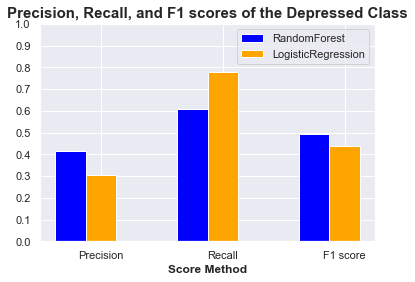

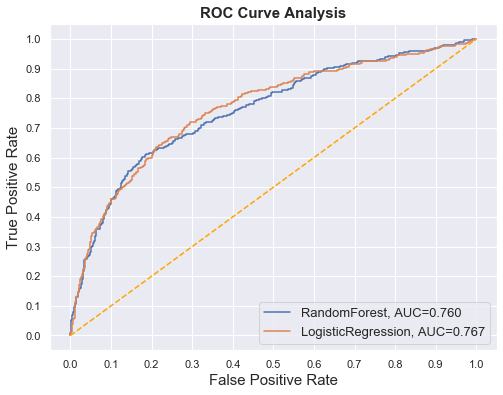

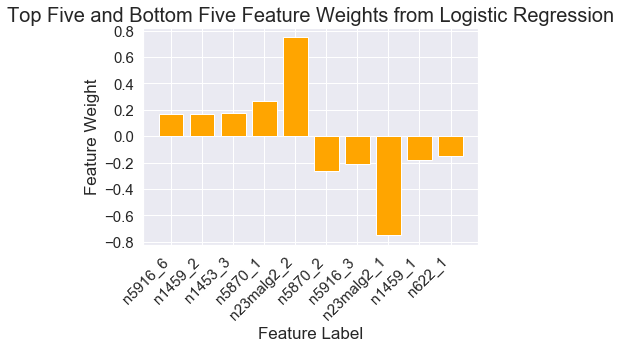

\begin{tabular}{lllr}
\toprule
Variable Label &                                    Definition &          Response &  Feature Weight \\
\midrule
       n5916\_6 &               4I Played sport in past 4 weeks &  NOT DONE LST4WKS &        0.167547 \\
       n1459\_2 &                      2P Does child bite nails &    Yes, sometimes &        0.168834 \\
       n1453\_3 &         2P Does child worry about many things &   Yes, frequently &        0.179592 \\
       n5870\_1 &      4I Psychol prob-specialist seen since 16 &               YES &        0.263931 \\
    n23malg2\_2 &  ncds age 23: total Malaise score - grouped 2 &                8+ &        0.749358 \\
       n5870\_2 &      4I Psychol prob-specialist seen since 16 &                NO &       -0.266522 \\
       n5916\_3 &               4I Played sport in past 4 weeks &   1-2TIMES A WEEK &       -0.212011 \\
    n23malg2\_1 &  ncds age 23: total Malaise score - grouped 2 &               0-7 &       -0.749358 \\
       n1459\_1 

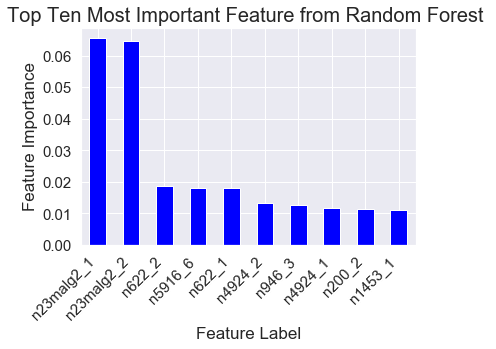

\begin{tabular}{lllr}
\toprule
Variable Label &                                    Definition &          Response &  Feature Weight \\
\midrule
    n23malg2\_1 &  ncds age 23: total Malaise score - grouped 2 &               0-7 &        0.065670 \\
    n23malg2\_2 &  ncds age 23: total Malaise score - grouped 2 &                8+ &        0.064580 \\
        n622\_2 &                             0-3D Sex of child &            Female &        0.018743 \\
       n5916\_6 &               4I Played sport in past 4 weeks &  NOT DONE LST4WKS &        0.018073 \\
        n622\_1 &                             0-3D Sex of child &              Male &        0.018045 \\
       n4924\_2 &            4I Has respondent had any children &                NO &        0.013221 \\
        n946\_3 &      2T Pupil sews,knits outside school hours &       Hardly ever &        0.012714 \\
       n4924\_1 &            4I Has respondent had any children &               YES &        0.011862 \\
        n200\_2 

In [99]:
ohe05_g2_results = roc_curves_all_classifiers(ohe05_g2)

y_test proportions:

Proportions: 
Ones: 0.7101449275362319
Twos: 0.2898550724637681

y_train proportions:

Proportions: 
Ones: 0.7087011349306431
Twos: 0.29129886506935687


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.722, test=0.604), total=  21.9s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.0s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.729, test=0.545), total=  22.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   46.3s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.739, test=0.550), total=  21.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.731, test=0.584), total=  22.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.728, test=0.518), total=  21.6s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.636, test=0.541), total=   8.5s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.634, test=0.495), total=   8.6s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.2min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.623, test=0.496), total=   8.5s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.4min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.637, test=0.544), total=   8.7s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.6min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.633, test=0.476), total=   8.4s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.726, test=0.593), total=  25.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.736, test=0.550), total=  25.5s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestcl

[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.702, test=0.523), total=  24.6s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.510, test=0.492), total=   9.6s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.525, test=0.495), total=   9.6s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier_

[CV]  randomforestclassifier__class_weight={1: 0.25, 2: 0.75}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.465, test=0.418), total=  12.1s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.504, test=0.486), total=  26.1s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.519, test=0.489), total=  26.2s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features

[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.466, test=0.419), total=  25.7s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.450, test=0.457), total=   9.1s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.450, test=0.457), total=   9.3s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_f

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 30.7min finished



y_pred proportions:

Proportions: 
Ones: 0.6628859483301828
Twos: 0.3371140516698173



Best score in CV:  0.5612730080109802 

Best Estimator:  Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=2, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={1: 0.35, 2: 0.65},
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.458, test=0.467), total=  18.1s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s remaining:    0.0s
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466:

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.457, test=0.467), total=  14.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.0s remaining:    0.0s
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466:

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.461, test=0.452), total=  12.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   45.7s remaining:    0.0s
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466:

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.448, test=0.486), total=  10.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   56.6s remaining:    0.0s
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466:

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.468, test=0.422), total=  12.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.452, test=0.461), total=   2.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.460), total=   1.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.455, test=0.444), total=   1.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.444, test=0.480), total=   1.6s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.459, test=0.418), total=   1.6s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear, score=(train=0.452, test=0.460), total=   1.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear, score=(train=0.452, test=0.457), total=   1.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregress

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.451, test=0.458), total=  13.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.451, test=0.458), total=  15.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.454, test=0.445), total=  12.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.444, test=0.480), total=  14.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.461, test=0.417), total=  13.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.6s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.450, test=0.457), total=  14.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.450, test=0.457), total=  14.1s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.453, test=0.443), total=  12.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.444, test=0.480), total=  15.6s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.459, test=0.418), total=  15.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   2.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   2.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfg

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.450, test=0.457), total=  14.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.450, test=0.457), total=  15.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.453, test=0.443), total=  16.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.444, test=0.480), total=  13.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.459, test=0.418), total=  15.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   2.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.450, test=0.457), total=  15.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.450, test=0.457), total=  14.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.453, test=0.443), total=  12.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.444, test=0.480), total=  15.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.459, test=0.418), total=  15.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfg

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.596, test=0.548), total=  17.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.609, test=0.522), total=  17.3s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.604, test=0.517), total=  16.8s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.603, test=0.554), total=  17.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.622, test=0.484), total=  17.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.566, test=0.526), total=  21.8s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.574, test=0.516), total=  18.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.576, test=0.494), total=  17.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.572, test=0.528), total=  17.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.589, test=0.467), total=  16.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.456, test=0.460), total=   2.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.453, test=

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.530, test=0.504), total=  21.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.540, test=0.504), total=  19.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.535, test=0.476), total=  20.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.531, test=0.519), total=  18.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.547, test=0.448), total=  17.4s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.451, test=0.457), total=   2.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.458), total=   2.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.494, test=0.483), total=  22.3s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.499, test=0.495), total=  23.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.496, test=0.458), total=  20.2s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.492, test=0.504), total=  20.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.509, test=0.425), total=  20.2s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.8s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.453, test=

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.465, test=0.466), total=  22.8s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.467, test=0.471), total=  20.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.468, test=0.446), total=  16.2s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.457, test=0.491), total=  20.2s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.474, test=0.425), total=  20.5s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   2.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.720, test=0.521), total= 1.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.727, test=0.480), total= 1.4min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.725, test=0.507), total= 1.9min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.728, test=0.506), total= 1.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.738, test=0.445), total= 1.8min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.6s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.7s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.460, test=0.446),

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.703, test=0.518), total=  43.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.715, test=0.499), total=  31.5s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.713, test=0.503), total= 1.7min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.719, test=0.506), total= 1.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.735, test=0.452), total= 1.4min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.6s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.475, test=0.480), total=   9.5s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.453, test=0.443), total=   1.7s

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.694, test=0.526), total= 1.4min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.698, test=0.496), total=  58.3s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.701, test=0.502), total= 1.2min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.703, test=0.512), total= 1.2min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.724, test=0.452), total=  58.0s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.451, test=0.457), total=   2.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.9s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.454, test=0.444),

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.677, test=0.526), total=  55.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.681, test=0.494), total= 1.2min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.682, test=0.492), total= 1.2min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.684, test=0.511), total= 1.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.705, test=0.450), total=  43.4s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   2.0s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   1.6s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.453, test=0.443), total=   2.9s

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.650, test=0.505), total= 1.1min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.656, test=0.500), total= 1.7min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.659, test=0.484), total=  59.7s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.663, test=0.509), total= 1.9min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.679, test=0.448), total= 1.2min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   4.0s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.450, test=0.457), total=   2.6s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.453, test=0.443),

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 53.2min finished


Proportions: 
Ones: 0.40894770006301195
Twos: 0.591052299936988

Best score in CV:  0.5279398472084351 

Best parameters:  {'logisticregression__C': 0.01, 'logisticregression__class_weight': {1: 0.35, 2: 0.65}, 'logisticregression__solver': 'liblinear'} 

Test accuracy score:  0.6005040957781979

F1 Scoring for Depressed Class.
Test precision:  0.4072494669509595
Test recall:  0.8304347826086956
Test f1 accuracy score:  0.5464949928469242


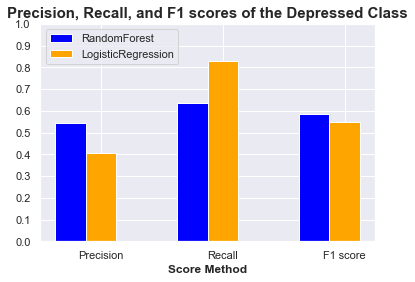

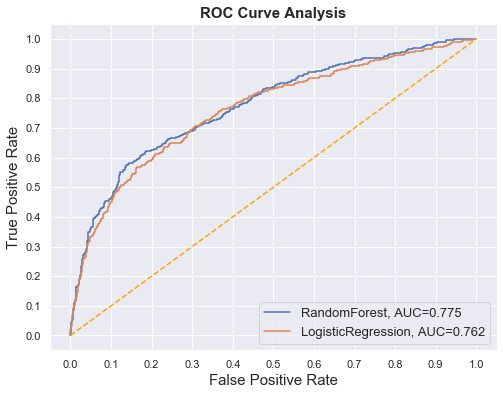

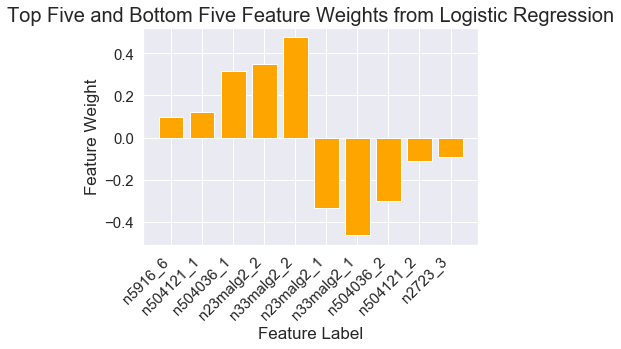

\begin{tabular}{lllr}
\toprule
Variable Label &                                         Definition &          Response &  Feature Weight \\
\midrule
       n5916\_6 &                    4I Played sport in past 4 weeks &  NOT DONE LST4WKS &        0.096654 \\
     n504121\_1 &  CMI:80 F27 Any lonstanding illness/disability/... &               Yes &        0.122206 \\
     n504036\_1 &  CMI:78 F21 Suffered any 'emotional problem' si... &               Yes &        0.315364 \\
    n23malg2\_2 &       ncds age 23: total Malaise score - grouped 2 &                8+ &        0.349394 \\
    n33malg2\_2 &       ncds age 33: total Malaise score - grouped 2 &                8+ &        0.475980 \\
    n23malg2\_1 &       ncds age 23: total Malaise score - grouped 2 &               0-7 &       -0.337072 \\
    n33malg2\_1 &       ncds age 33: total Malaise score - grouped 2 &               0-7 &       -0.463658 \\
     n504036\_2 &  CMI:78 F21 Suffered any 'emotional problem' si... &           

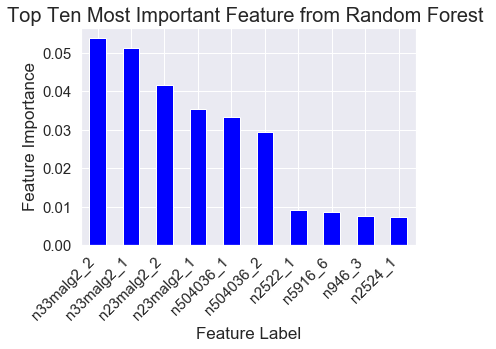

\begin{tabular}{lllr}
\toprule
Variable Label &                                         Definition &          Response &  Feature Weight \\
\midrule
    n33malg2\_2 &       ncds age 33: total Malaise score - grouped 2 &                8+ &        0.053866 \\
    n33malg2\_1 &       ncds age 33: total Malaise score - grouped 2 &               0-7 &        0.051347 \\
    n23malg2\_2 &       ncds age 23: total Malaise score - grouped 2 &                8+ &        0.041732 \\
    n23malg2\_1 &       ncds age 23: total Malaise score - grouped 2 &               0-7 &        0.035374 \\
     n504036\_1 &  CMI:78 F21 Suffered any 'emotional problem' si... &               Yes &        0.033172 \\
     n504036\_2 &  CMI:78 F21 Suffered any 'emotional problem' si... &                No &        0.029332 \\
       n2522\_1 &                      3P Often worries about things &    Does not apply &        0.009132 \\
       n5916\_6 &                    4I Played sport in past 4 weeks &  NOT DONE 

In [100]:
ohe06_g2_results = roc_curves_all_classifiers(ohe06_g2)

y_test proportions:

Proportions: 
Ones: 0.8059479553903346
Twos: 0.19405204460966544

y_train proportions:

Proportions: 
Ones: 0.7811105602379772
Twos: 0.2188894397620228


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.695, test=0.536), total=  22.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.1s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.694, test=0.534), total=  22.5s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   46.5s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.695, test=0.524), total=  22.7s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.690, test=0.564), total=  21.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.683, test=0.571), total=  22.5s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.705, test=0.502), total=   7.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.706, test=0.521), total=   8.2s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.2min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.699, test=0.492), total=   8.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.4min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.695, test=0.513), total=   7.9s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.702, test=0.542), total=   8.3s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.703, test=0.548), total=  25.5s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.694, test=0.525), total=  25.6s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestcl

[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.678, test=0.569), total=  24.1s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.596, test=0.470), total=   8.9s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.597, test=0.469), total=   8.6s
[CV] randomforestclassifier__class_weight={1: 0.3, 2: 0.7}, randomforestclassifier__criterion=entropy, randomforestclassifier_

[CV]  randomforestclassifier__class_weight={1: 0.25, 2: 0.75}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=log2, score=(train=0.462, test=0.431), total=   9.5s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.600, test=0.486), total=  24.5s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.597, test=0.494), total=  24.1s
[CV] randomforestclassifier__class_weight={1: 0.2, 2: 0.8}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features

[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.494, test=0.449), total=  26.2s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.359, test=0.358), total=   8.7s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 
[CV]  randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.356, test=0.371), total=   9.0s
[CV] randomforestclassifier__class_weight={1: 0.15, 2: 0.85}, randomforestclassifier__criterion=gini, randomforestclassifier__max_f

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 29.0min finished



y_pred proportions:

Proportions: 
Ones: 0.7026022304832714
Twos: 0.29739776951672864



Best score in CV:  0.5601140622982558 

Best Estimator:  Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=2, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={1: 0.3, 2: 0.7},
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.373, test=0.375), total=  15.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466:

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.378, test=0.377), total=  13.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.9s remaining:    0.0s
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search faile

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.379, test=0.367), total=   8.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   37.1s remaining:    0.0s
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426:

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.385, test=0.342), total=  12.6s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   49.9s remaining:    0.0s
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.370, test=0.390), total=   5.1s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.3s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.366, test=0.372), total=   1.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.0s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.376, test=0.377), total=   2.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   59.9s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.380, test=0.367), total=   2.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.380, test=0.336), total=   1.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.358, test=0.381), total=   1.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear, score=(train=0.372, test=0.374), total=   1.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear, score=(train=0.378, test=0.379), total=   1.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=liblinear 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregress

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.365, test=0.362), total=  18.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.364, test=0.377), total=  14.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.366, test=0.362), total=   8.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.372, test=0.331), total=  18.1s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.360, test=0.383), total=   7.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.359, test=0.358), total=   1.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.363, test=0.375), total=   2.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.361, test=0.356), total=   9.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.357, test=0.372), total=  18.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.361, test=0.359), total=  11.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.367, test=0.330), total=  19.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.356, test=0.379), total=   5.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.359, test=0.359), total=   1.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.358, test=0.376), total=   2.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfg

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.360, test=0.359), total=  13.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.356, test=0.372), total=  13.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.360, test=0.357), total=   9.7s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.366, test=0.333), total=  14.2s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.355, test=0.377), total=   9.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.360, test=0.357), total=   2.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.356, test=0.372), total=   1.5s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.360, test=0.359), total=  14.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.356, test=0.371), total=  13.3s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.360, test=0.356), total=  11.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.366, test=0.333), total=  12.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.355, test=0.377), total=   7.8s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.360, test=0.358), total=   1.9s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.356, test=0.371), total=   1.4s
[CV] logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfg

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.596, test=0.501), total=  18.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.592, test=0.506), total=  20.5s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.595, test=0.475), total=  17.5s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.593, test=0.480), total=  18.2s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.590, test=0.520), total=  18.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.497, test=0.461), total=  10.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.506, test=0.483), total=  11.8s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.561, test=0.479), total=  25.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.564, test=0.486), total=  28.5s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.573, test=0.475), total=  21.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.571, test=0.470), total=  25.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.559, test=0.502), total=  20.3s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.386, test=0.375), total=   2.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.482, test=0.456), total=  13.4s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.361, test=

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.521, test=0.460), total=  28.8s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.523, test=0.462), total=  30.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.528, test=0.458), total=  27.5s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.534, test=0.440), total=  21.1s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.524, test=0.465), total=  15.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.468, test=0.428), total=  12.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.357, test=0.374), total=   1.4s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.472, test=0.427), total=  23.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.477, test=0.437), total=  25.3s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.482, test=0.430), total=  21.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.483, test=0.415), total=  21.4s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.474, test=0.443), total=  25.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.360, test=0.358), total=   1.2s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.357, test=0.373), total=   2.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.360, test=

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.420, test=0.398), total=  16.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.428, test=0.412), total=  26.7s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.433, test=0.403), total=  31.8s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.429, test=0.376), total=  21.5s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.418, test=0.415), total=  23.6s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.360, test=0.358), total=   1.3s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.356, test=0.371), total=   1.4s
[CV] logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=0.01, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(trai

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.783, test=0.474), total=13.0min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.808, test=0.465), total= 3.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.796, test=0.435), total=11.9min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.805, test=0.403), total= 6.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=newton-cg, score=(train=0.811, test=0.442), total= 9.7min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.520, test=0.474), total=  11.4s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.515, test=0.490), total=  14.2s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.35, 2: 0.65}, logisticregression__solver=lbfgs, score=(train=0.370, test=0.352),

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.768, test=0.477), total= 2.9min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.790, test=0.472), total= 2.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.781, test=0.431), total=18.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.792, test=0.405), total=12.8min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=newton-cg, score=(train=0.800, test=0.443), total= 3.4min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.364, test=0.365), total=   1.7s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.388, test=0.384), total=   2.7s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.3, 2: 0.7}, logisticregression__solver=lbfgs, score=(train=0.361, test=0.359), total=   1.2s

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.751, test=0.481), total=11.8min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.775, test=0.474), total= 5.0min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.762, test=0.421), total=17.9min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.766, test=0.419), total= 4.2min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=newton-cg, score=(train=0.779, test=0.448), total= 6.8min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.509, test=0.457), total=  18.5s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.379, test=0.381), total=   3.8s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.25, 2: 0.75}, logisticregression__solver=lbfgs, score=(train=0.376, test=0.367),

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.728, test=0.487), total= 8.9min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.745, test=0.469), total=  35.2s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.739, test=0.416), total= 8.6min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.743, test=0.424), total=12.2min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=newton-cg, score=(train=0.756, test=0.452), total= 8.9min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.360, test=0.358), total=   1.5s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.458, test=0.444), total=  16.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.2, 2: 0.8}, logisticregression__solver=lbfgs, score=(train=0.360, test=0.356), total=   1.4s

C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.702, test=0.478), total=11.1min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.714, test=0.467), total=  44.1s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.708, test=0.438), total= 9.9min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.717, test=0.444), total=12.4min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg 


C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=newton-cg, score=(train=0.718, test=0.453), total=12.8min
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.360, test=0.358), total=   1.3s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.356, test=0.371), total=   1.5s
[CV] logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs 
[CV]  logisticregression__C=1, logisticregression__class_weight={1: 0.15, 2: 0.85}, logisticregression__solver=lbfgs, score=(train=0.360, test=0.356),

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 242.0min finished
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lukem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSear

Proportions: 
Ones: 0.5598513011152416
Twos: 0.4401486988847584

Best score in CV:  0.49625707373019723 

Best parameters:  {'logisticregression__C': 0.01, 'logisticregression__class_weight': {1: 0.35, 2: 0.65}, 'logisticregression__solver': 'newton-cg'} 

Test accuracy score:  0.6631970260223048

F1 Scoring for Depressed Class.
Test precision:  0.33783783783783783
Test recall:  0.7662835249042146
Test f1 accuracy score:  0.4689331770222743


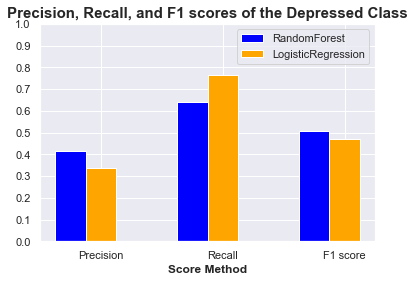

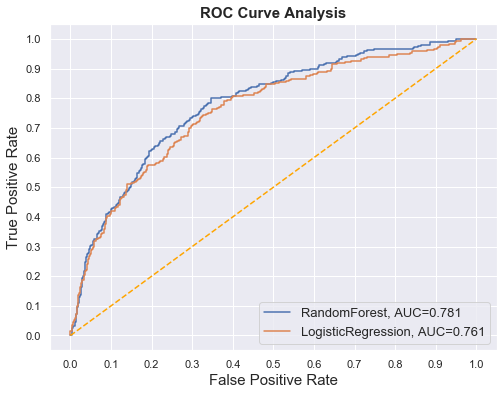

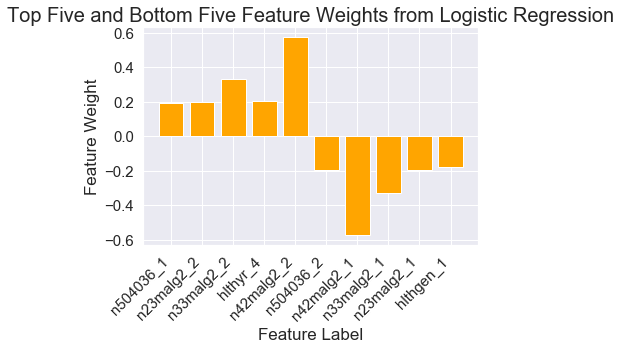

\begin{tabular}{lllr}
\toprule
Variable Label &                                         Definition &     Response &  Feature Weight \\
\midrule
     n504036\_1 &  CMI:78 F21 Suffered any 'emotional problem' si... &          Yes &        0.193923 \\
    n23malg2\_2 &       ncds age 23: total Malaise score - grouped 2 &           8+ &        0.195425 \\
    n33malg2\_2 &       ncds age 33: total Malaise score - grouped 2 &           8+ &        0.329270 \\
      hlthyr\_4 &                 Health over the last twelve months &  Not so good &        0.202048 \\
    n42malg2\_2 &       ncds age 42: total Malaise score - grouped 2 &           8+ &        0.572876 \\
     n504036\_2 &  CMI:78 F21 Suffered any 'emotional problem' si... &           No &       -0.193845 \\
    n42malg2\_1 &       ncds age 42: total Malaise score - grouped 2 &          0-7 &       -0.572797 \\
    n33malg2\_1 &       ncds age 33: total Malaise score - grouped 2 &          0-7 &       -0.329191 \\
    n23malg2\_1 

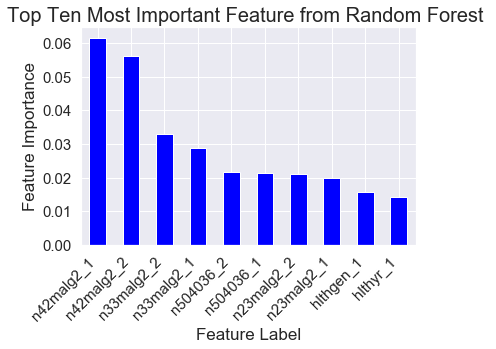

\begin{tabular}{lllr}
\toprule
Variable Label &                                         Definition &   Response &  Feature Weight \\
\midrule
    n42malg2\_1 &       ncds age 42: total Malaise score - grouped 2 &        0-7 &        0.061509 \\
    n42malg2\_2 &       ncds age 42: total Malaise score - grouped 2 &         8+ &        0.056189 \\
    n33malg2\_2 &       ncds age 33: total Malaise score - grouped 2 &         8+ &        0.033026 \\
    n33malg2\_1 &       ncds age 33: total Malaise score - grouped 2 &        0-7 &        0.028703 \\
     n504036\_2 &  CMI:78 F21 Suffered any 'emotional problem' si... &         No &        0.021557 \\
     n504036\_1 &  CMI:78 F21 Suffered any 'emotional problem' si... &        Yes &        0.021335 \\
    n23malg2\_2 &       ncds age 23: total Malaise score - grouped 2 &         8+ &        0.021055 \\
    n23malg2\_1 &       ncds age 23: total Malaise score - grouped 2 &        0-7 &        0.019902 \\
     hlthgen\_1 &                 

In [32]:
ohe08_g2_results = roc_curves_all_classifiers(ohe08_g2)

In [33]:
#ohe04_g2_ever_results = roc_curves_all_classifiers(ohe04_ever2)

y_test proportions:

Proportions: 
Ones: 0.547711404189294
Twos: 0.45228859581070596

y_train proportions:

Proportions: 
Ones: 0.5516170763260025
Twos: 0.4483829236739974


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.678, test=0.628), total=  10.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.679, test=0.641), total=  10.7s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.9s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.675, test=0.660), total=  10.9s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.6s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.678, test=0.622), total=  11.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   46.3s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=auto, score=(train=0.674, test=0.623), total=  10.6s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   57.6s remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.631, test=0.614), total=   6.0s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.626, test=0.636), total=   5.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.625, test=0.638), total=   5.9s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.630, test=0.605), total=   5.8s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=gini, randomforestclassifier__max_features=log2, score=(train=0.630, test=0.617), total=   6.3s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.677, test=0.621), total=  11.3s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto 
[CV]  randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=auto, score=(train=0.680, test=0.647), total=  11.4s
[CV] randomforestclassifier__class_weight={1: 0.35, 2: 0.65}, randomforestclassifier__criterion=entropy, randomforestcl

KeyboardInterrupt: 